In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('C:/Users/mruge/Downloads/emails1')
df.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [7]:
df.shape

(48076, 5)

In [8]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [10]:
# drop unnecessory columns
df.drop(columns=['Unnamed: 0','filename','Message-ID'],inplace=True)
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['Class'] = encoder.fit_transform(df['Class'])
df.head(5)

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [18]:
# missing values
df.isnull().sum()

content    0
Class      0
dtype: int64

In [19]:
# check for duplicate values
df.duplicated().sum()

23420

In [20]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(24656, 2)

## 2. EDA

In [23]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [25]:
df['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

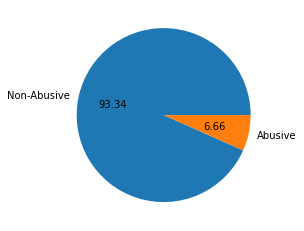

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['Non-Abusive','Abusive'],autopct="%0.2f")
plt.show()

In [27]:
# Data is imbalanced

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# No. of characters
df['Num_characters'] = df['content'].apply(len)
df.head()

,content,Class,Num_characters
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [31]:
# No. of words
df['Num_words'] = df['content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
df.head()

,content,Class,Num_characters,Num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [33]:
# No. of sentences
df['Num_sentences'] = df['content'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,content,Class,Num_characters,Num_words,Num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [36]:
df[['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.356789,12.570409
std,5394.644531,818.237457,26.921471
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [37]:
# Non_Abusive
df[df['Class']==0][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.700365,16.955542
std,2834.633786,590.602208,32.171859
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [38]:
# Abusive
df[df['Class']==1][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.189580,12.257539
std,5532.160062,832.111557,26.480239
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [39]:
import seaborn as sns

<AxesSubplot:xlabel='Num_characters', ylabel='Count'>

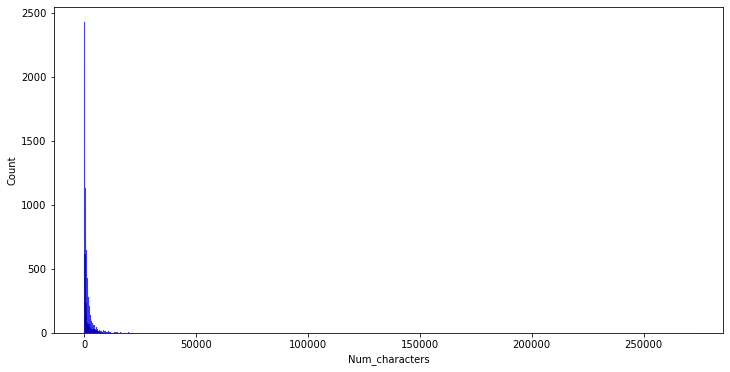

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Num_characters'],color='red')
sns.histplot(df[df['Class'] == 1]['Num_characters'],color='blue')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

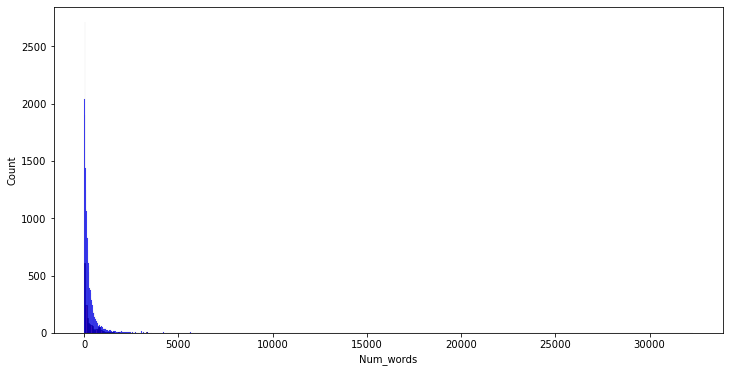

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Num_words'],color='red')
sns.histplot(df[df['Class'] == 1]['Num_words'],color='blue')

<AxesSubplot:xlabel='Num_sentences', ylabel='Count'>

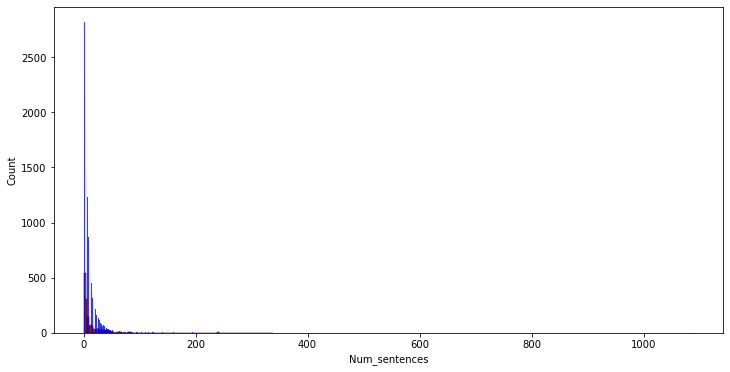

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Num_sentences'],color='red')
sns.histplot(df[df['Class'] == 1]['Num_sentences'],color='blue')

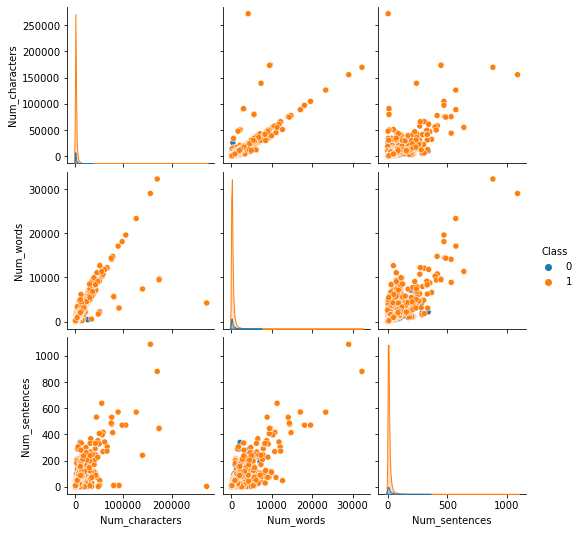

In [52]:
sns.pairplot(df,hue='Class')

<AxesSubplot:>

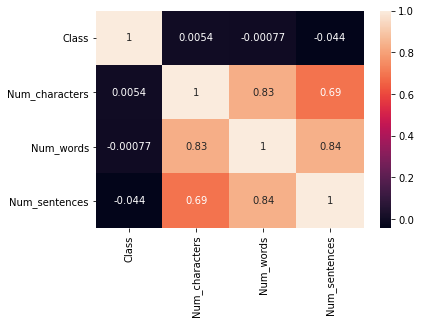

In [53]:
sns.heatmap(df.corr(),annot=True)

According to the analysis, there are maximum no. of characters, words and senteces are used in Abusive emails than Non_Abusive emails.

## 3. Data Preprocessing

In [63]:
import string

In [64]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [67]:
def transform_text(content):
    content = content.lower()
    content = nltk.word_tokenize(content)
    
    y = []
    for i in content:
        if i.isalnum():
            y.append(i)
    
    content = y[:]
    y.clear()
    
    for i in content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    content = y[:]
    y.clear()
    
    for i in content:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [68]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [69]:
df['Transformed_content'] = df['content'].apply(transform_text)

In [70]:
df.head()

,content,Class,Num_characters,Num_words,Num_sentences,Transformed_content
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


In [71]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [73]:
abusive_wc = wc.generate(df[df['Class'] == 1]['Transformed_content'].str.cat(sep=" "))

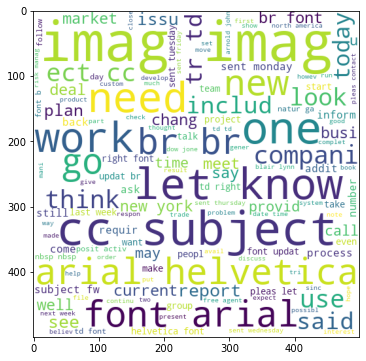

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(abusive_wc)

In [75]:
nonabusive_wc = wc.generate(df[df['Class'] == 0]['Transformed_content'].str.cat(sep=" "))

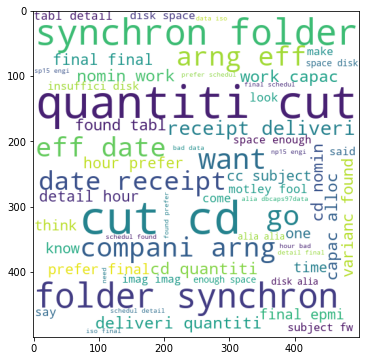

In [76]:
plt.figure(figsize=(15,6))
plt.imshow(nonabusive_wc)

In [79]:
abusive_corpus = []
for msg in df[df['Class'] == 1]['Transformed_content'].tolist():
    for word in msg.split():
        abusive_corpus.append(word)

In [80]:
len(abusive_corpus)

3209347

C:\Users\mruge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


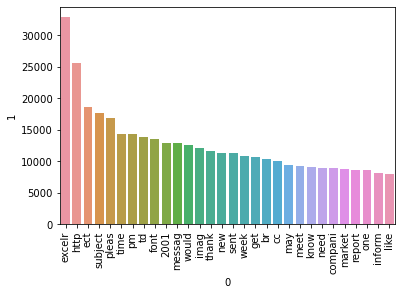

In [81]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(abusive_corpus).most_common(30))[0],pd.DataFrame(Counter(abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [83]:
nonabusive_corpus = []
for msg in df[df['Class'] == 0]['Transformed_content'].tolist():
    for word in msg.split():
        nonabusive_corpus.append(word)

In [85]:
len(nonabusive_corpus)

208413

C:\Users\mruge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


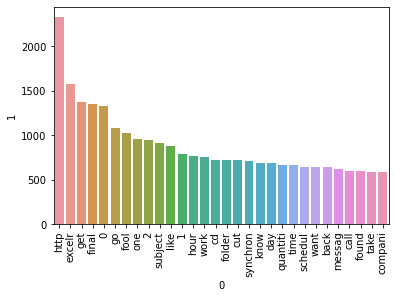

In [84]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(nonabusive_corpus).most_common(30))[0],pd.DataFrame(Counter(nonabusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
df.head()

,content,Class,Num_characters,Num_words,Num_sentences,Transformed_content
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


## 4. Feature Extraction

In [87]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [88]:
X = tfidf.fit_transform(df['Transformed_content']).toarray()

In [89]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
X.shape

(24656, 3000)

In [91]:
y = df['Class'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [92]:
y.shape

(24656,)

## 5. Model Building

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [96]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7915652879156528
[[ 259   71]
 [ 957 3645]]
0.9808934337997847


In [98]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9572181670721817
[[ 176  154]
 [  57 4545]]
0.9672270695892743


In [99]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8227899432278994
[[ 288   42]
 [ 832 3770]]
0.9889821615949633


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [101]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [102]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [103]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [104]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758718572587186, 0.9790553537080573)

In [105]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758718572587186
Precision -  0.9790553537080573
For  KN
Accuracy -  0.9511354420113545
Precision -  0.9528556593977154
For  NB
Accuracy -  0.9572181670721817
Precision -  0.9672270695892743
For  DT
Accuracy -  0.9525547445255474
Precision -  0.9540540540540541
For  LR
Accuracy -  0.9760746147607462
Precision -  0.9776310183212612
For  RF
Accuracy -  0.975669099756691
Precision -  0.9764030612244898
For  AdaBoost
Accuracy -  0.9610705596107056
Precision -  0.9665679221328819
For  BgC
Accuracy -  0.9734387672343877
Precision -  0.9825167278221455
For  ETC
Accuracy -  0.9734387672343877
Precision -  0.9745277011250265
For  GBDT
Accuracy -  0.9630981346309814
Precision -  0.9631181894383906


C:\Users\mruge\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9732360097323601
Precision -  0.9747238742565846


In [106]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [107]:
performance_df

,Algorithm,Accuracy,Precision
7,BgC,0.973439,0.982517
0,SVC,0.975872,0.979055
4,LR,0.976075,0.977631
5,RF,0.975669,0.976403
10,xgb,0.973236,0.974724
8,ETC,0.973439,0.974528
2,NB,0.957218,0.967227
6,AdaBoost,0.961071,0.966568
9,GBDT,0.963098,0.963118
3,DT,0.952555,0.954054


#### Inference: Best model- Based on the metrices , I have chosen LogisticClassifier as my best model, as it has less prediction time as well as good accuracy and precision.

In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(lrc,open('model.pkl', 'wb'))